In [19]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Importing Necessary Libraries for Audio Files
import librosa
import librosa.display
from IPython.display import Audio
import IPython.display as ipd

In [21]:
# Importing Necessary Libraries for Neural Networks
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
!unzip '/content/torronto-emotional-speech-set-tess.zip'

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [29]:
base_path = '/content/tess toronto emotional speech set data'

In [30]:
import os
paths = []
labels = []
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #Extracting only the emotion
        label = filename.split('_')[-1]
        #Extracting the emotion except the file name
        label = label.split('.')[0]
        #Converting to lower case
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset has been loaded Successfully!')

Dataset has been loaded Successfully!


In [31]:
# Checking the first 10 rows
paths[:10]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_make_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_time_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_red_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_cab_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_dodge_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_fat_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_lean_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_thumb_fear.wav',
 '/content/tess toronto emotional speech set data/TESS To

In [32]:
#Checking for the length of the path
len(paths)

2800

In [33]:
# Displaying the first five labels
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

## **Creating DataFrame for Speech Data and Labels:**

In [34]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear


In [35]:
#Count of each labels
df['label'].value_counts()

,count
label,
fear,400
neutral,400
angry,400
ps,400
happy,400
disgust,400
sad,400


## **EDA [Exploratory Data Analysis]**

<Axes: xlabel='label', ylabel='count'>

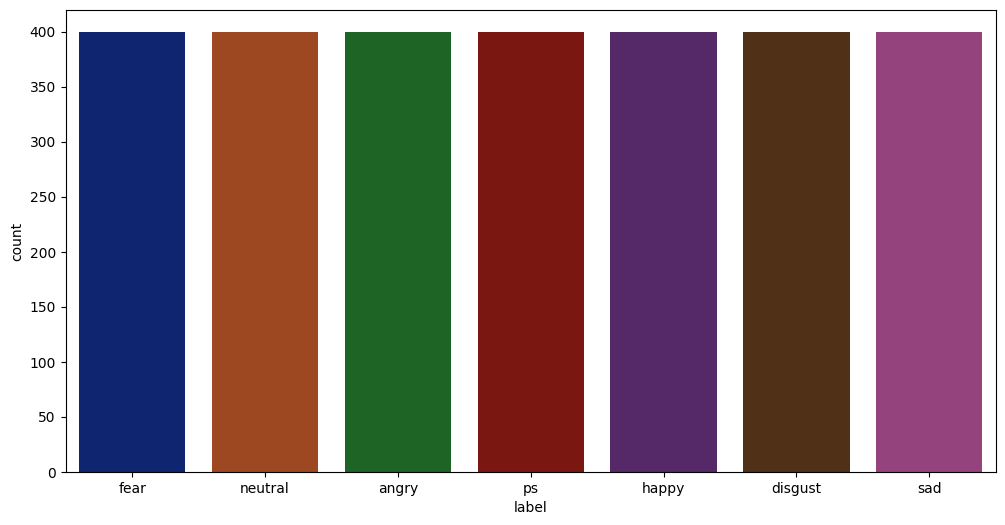

In [36]:
sns.countplot(x = df['label'], data=df, palette='dark')

## **Loading and Playing Audio Data:**

In [38]:
data, sampling_rate = librosa.load('/content/TESS Toronto emotional speech set data/OAF_happy/OAF_book_happy.wav')
ipd.Audio('/content/TESS Toronto emotional speech set data/OAF_happy/OAF_book_happy.wav')

## **Visualizing Audio Waveform:**

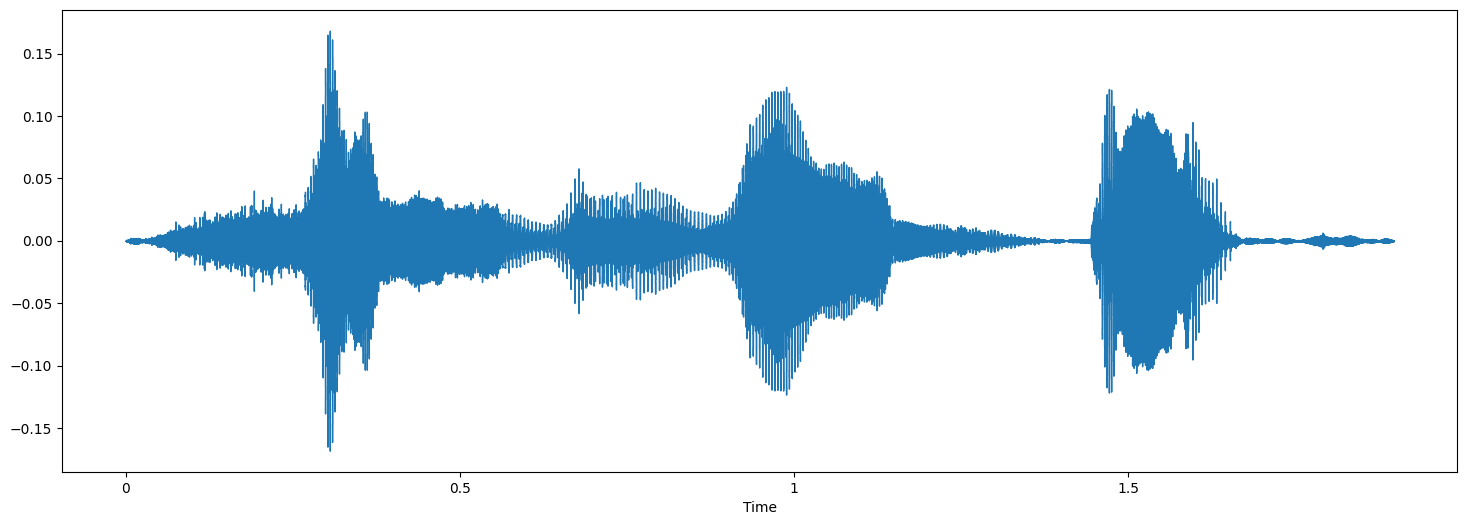

In [39]:
plt.figure(figsize=(18, 6))
librosa.display.waveshow(data, sr=sampling_rate)

In [40]:
# Defined Functions for Audio Visualization:

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr) ## sr=Sampling Rate
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x)) ##abs is used to extract only the value and not the sign
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

## **Label Emotion Speech Analysis:**

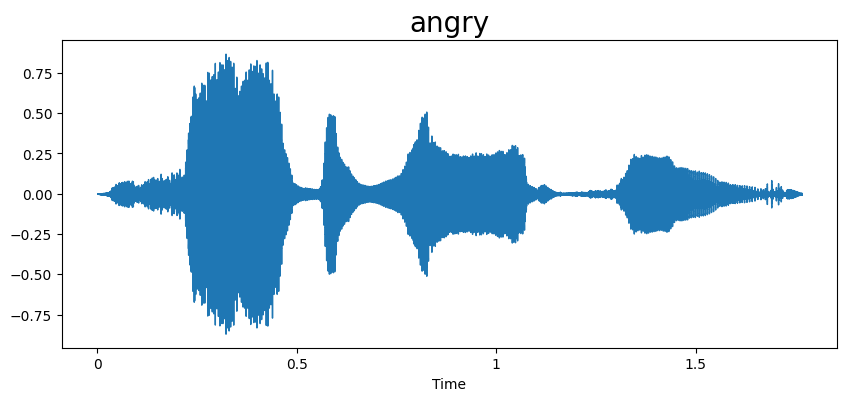

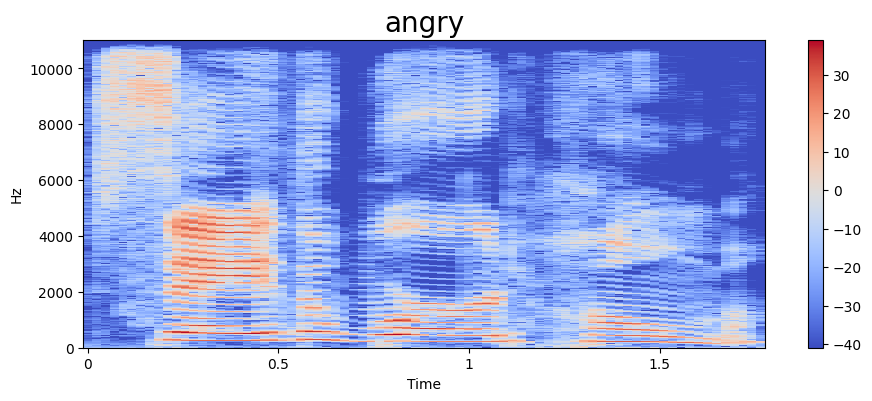

In [41]:
## Emotion --> Angry

emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

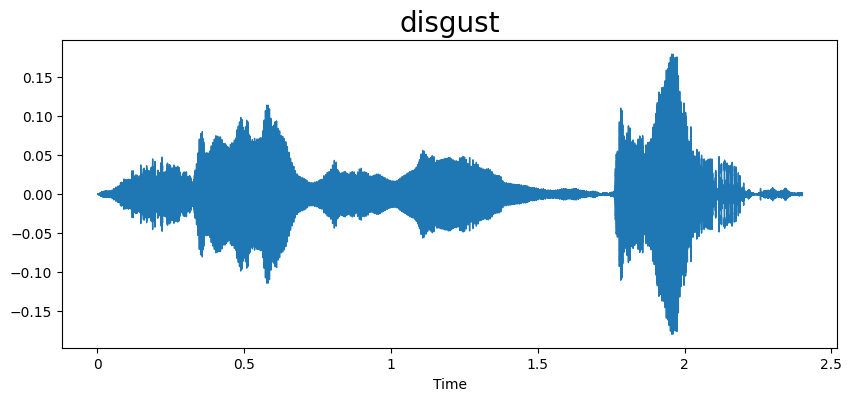

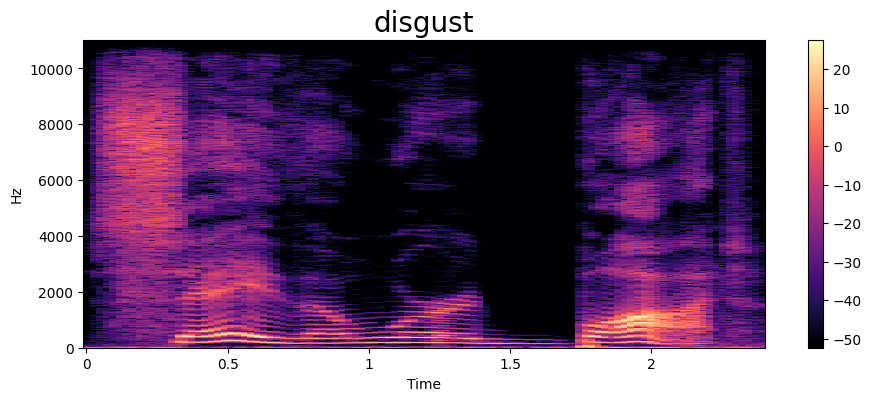

In [42]:
## Emotion --> Disgust

emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

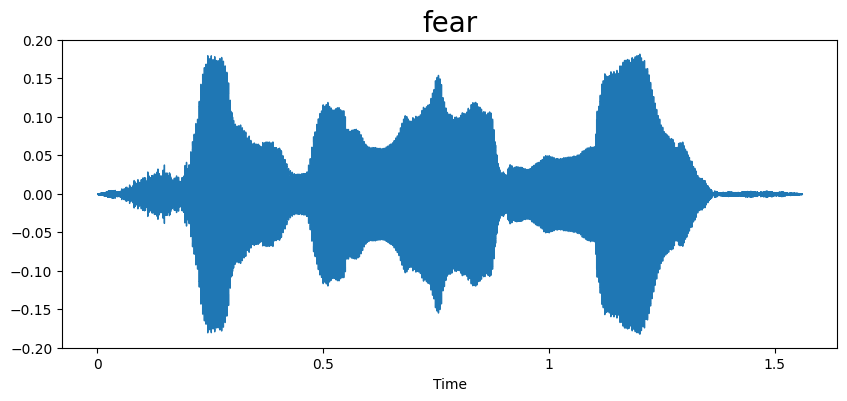

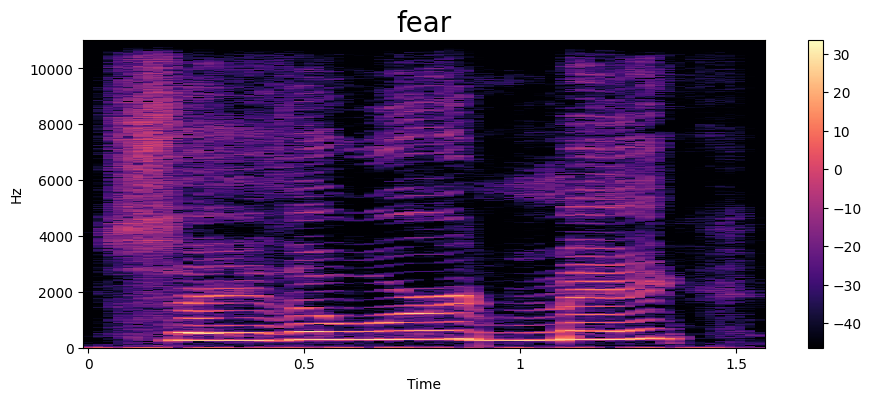

In [43]:
## Emotion --> Fear

emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

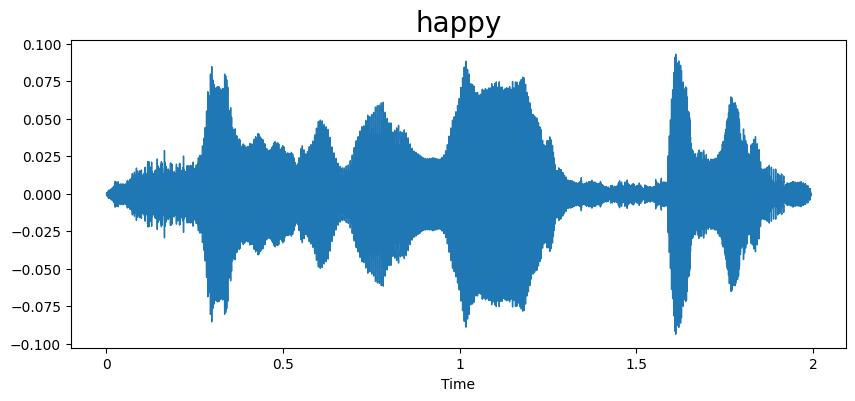

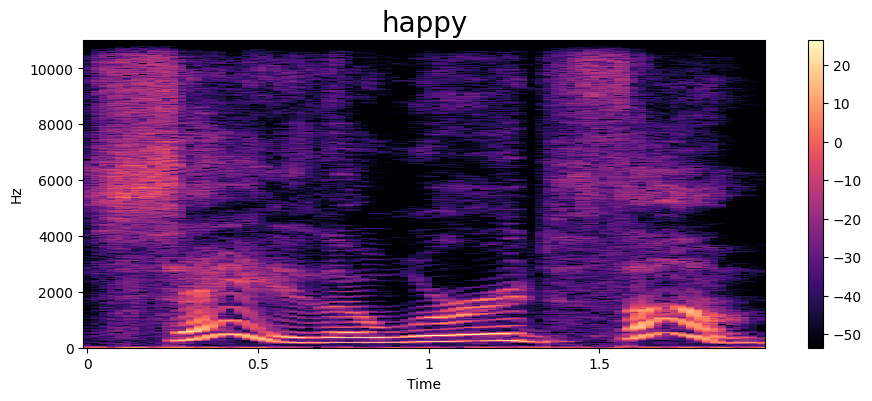

In [44]:
## Emotion --> Happy

emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

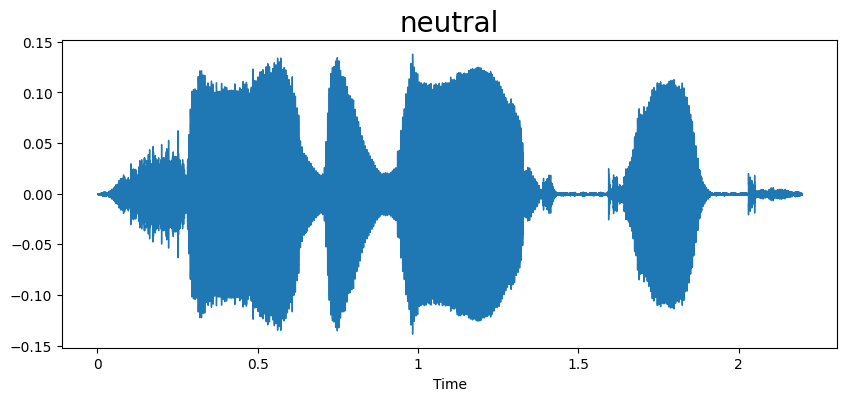

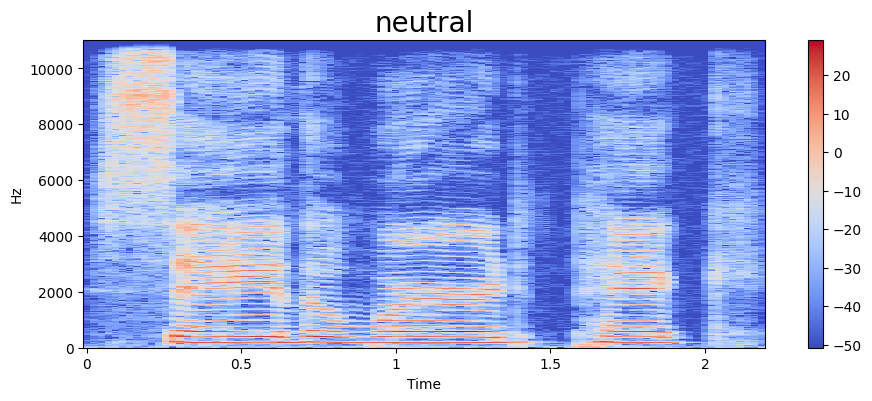

In [45]:
## Emotion --> Neutral
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

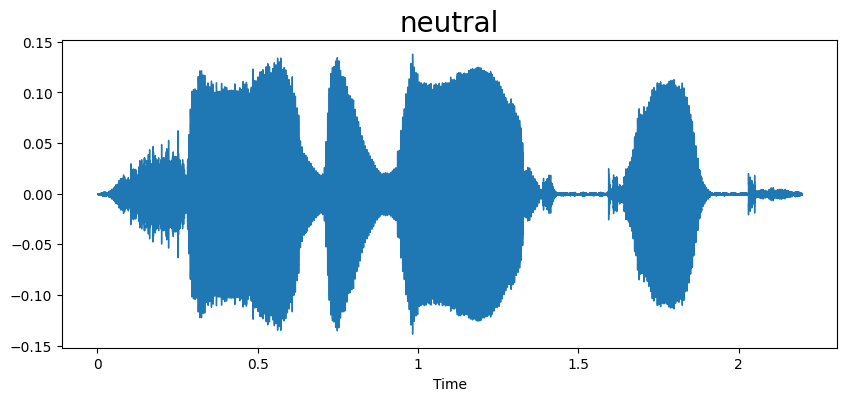

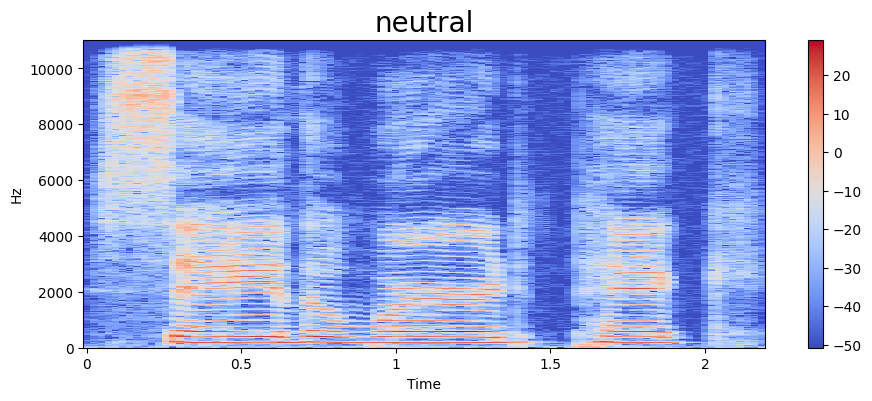

In [46]:
## Emotion --> Pleasant Surprise(ps)
motion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

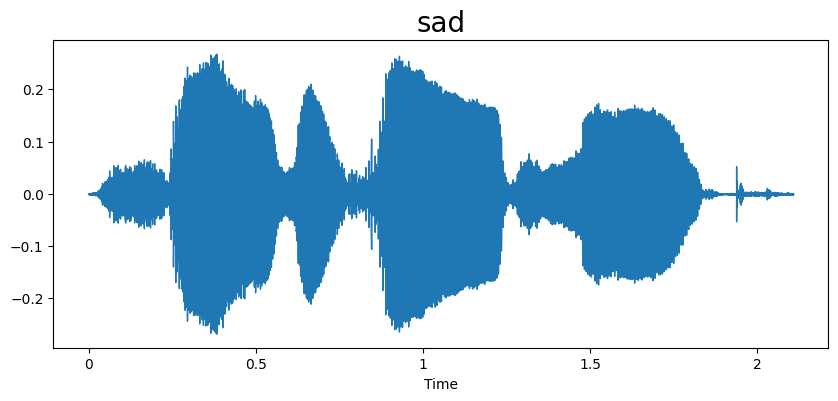

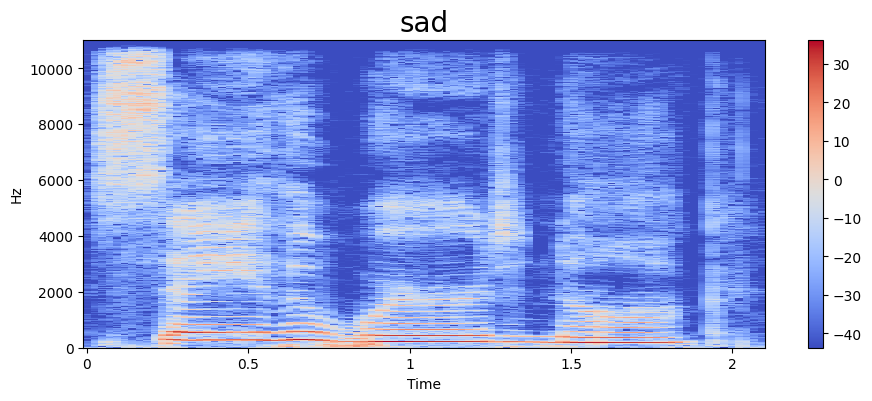

In [47]:
## Emotion --> Sad
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

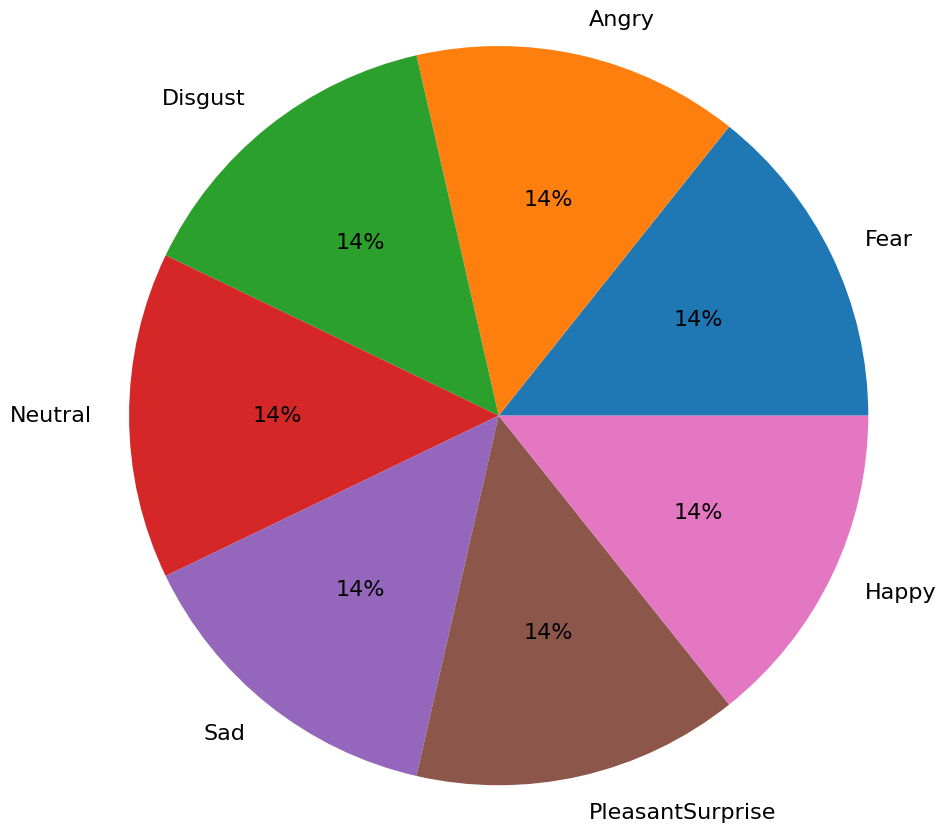

In [49]:
## Pie Chart --> Emotion Distribution:

labels = ["Fear", "Angry", "Disgust", "Neutral", "Sad","PleasantSurprise", "Happy"]
plt.pie(df['label'].value_counts(), labels = labels, autopct = '%.0f%%', radius= 2, textprops={'fontsize': 16})
plt.show()

In [50]:
## Feature Extraction using MFCC (Mel-frequency cepstral coefficients):
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

In [51]:
feature_extract_mfcc(df['speech'][0])

array([-4.2161575e+02,  7.1886749e+01,  3.4655268e+00, -1.2595891e+00,
        6.9849730e+00,  1.1855711e+00, -2.3669140e+01, -3.9480424e+00,
       -1.2947012e+01, -1.1110929e+01, -1.5398541e+01, -8.0095921e+00,
       -5.5294638e+00,  3.4246867e+00, -1.3583757e+01, -2.6401592e-02,
       -9.3942517e-01, -5.4312544e+00,  1.1645808e+00, -5.8925781e+00,
        1.4299470e+00,  2.2986536e+01,  2.0962997e+01,  3.1096960e+01,
        2.3955347e+01,  2.0585012e+01, -3.4647304e-01,  5.0551200e+00,
       -3.5828719e+00,  8.4885311e+00,  9.4356215e-01, -2.2265260e+00,
       -1.2476732e+00, -3.3232660e+00,  1.8594933e+00,  1.8838865e+00,
       -7.2334237e+00,  4.5912361e-01, -4.9244771e+00,  2.3670096e+00],
      dtype=float32)

In [52]:
MFCC = df['speech'].apply(lambda x: feature_extract_mfcc(x))
MFCC

,speech
0,"[-421.61575, 71.88675, 3.4655268, -1.2595891, ..."
1,"[-378.86758, 75.62611, -3.0879722, -19.763687,..."
2,"[-428.7984, 82.43286, 5.2509885, -24.473654, 3..."
3,"[-424.4262, 85.262344, 0.18252625, -18.061882,..."
4,"[-458.90762, 61.858913, 6.6702766, -8.0293, -4..."
...,...
2795,"[-523.5569, 118.091934, 39.993343, 6.9730954, ..."
2796,"[-557.9271, 89.87658, 33.66149, 15.339754, 22...."
2797,"[-560.82117, 101.97223, 18.342245, 8.967003, 1..."
2798,"[-505.13873, 92.92334, 20.218197, 14.202296, 1..."


In [58]:
X=[x for x in MFCC]
X=np.array(X)
X.shape

(2800, 40)

In [59]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

## **One-Hot Encoding:**

In [60]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y= y.toarray()

In [61]:
## Checking the rows and columns
y.shape

(2800, 7)

## **Splitting Data into Training and Testing Sets:**


In [62]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size= 0.20, random_state =30)

## **Creating a Speech Emotion Recognition Model using LSTM[Long-Short Term Memory]:**

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
## Training the model:

history = model.fit(x_train,y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3316 - loss: 1.6768 - val_accuracy: 0.7679 - val_loss: 0.7159
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7491 - loss: 0.6794 - val_accuracy: 0.8951 - val_loss: 0.3084
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8875 - loss: 0.3382 - val_accuracy: 0.9196 - val_loss: 0.2196
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9212 - loss: 0.2273 - val_accuracy: 0.9487 - val_loss: 0.1492
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9498 - loss: 0.1732 - val_accuracy: 0.9487 - val_loss: 0.1640
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9446 - loss: 0.1622 - val_accuracy: 0.9464 - val_loss: 0.1666
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9426 - loss: 0.1808 - val_accuracy: 0.9665 - val_loss: 0.1038
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9643 - loss: 0.1115 - val_accuracy: 0.9732 - val_loss

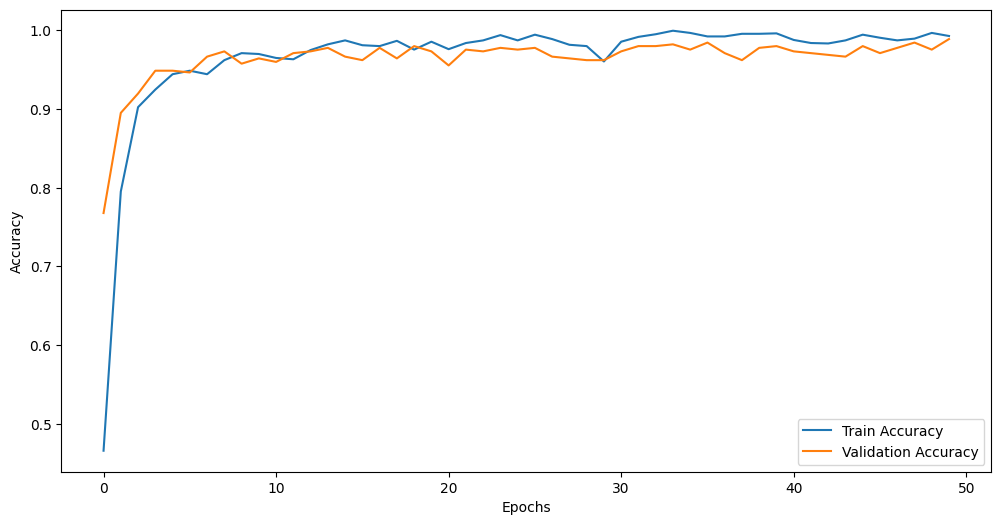

In [68]:
## Ploting the graph between Train Accuracy and Validation accuracy:

epochs = list(range(50))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

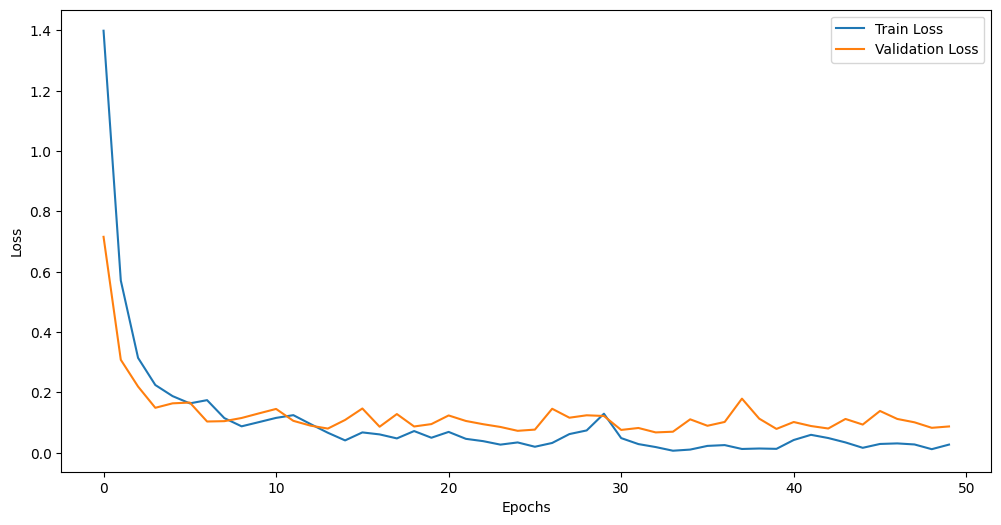

In [69]:
## Ploting the graph between Train Loss and Validation Loss:

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
## Evaluating the Model

model.evaluate(x_train , y_train)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9945 - loss: 0.0177


[0.027502918615937233, 0.9946428537368774]

In [72]:
## Predicting the Model
y_pred = model.predict(x_test, batch_size=5)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [73]:
## Viewing the Accuracy Score
Accuracy_Score=model.evaluate(x_test , y_test)
## To display the accuracy into 100
print("Model Evaluation Accuracy: ", round(Accuracy_Score[1]*100),"%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9762 - loss: 0.0754
Model Evaluation Accuracy:  98 %


In [80]:
## Saving the Trained Model:
save_dir = "Speech Emotion Recognition Project"
os.makedirs(save_dir, exist_ok=True)
My_Model_File = os.path.join(save_dir, "Speech_Emotion_Recognition_model.h5")## .h5 denotes the format of the file
model.save('My_Model_File.keras')

In [84]:
model_name = 'Speech_Emotion_Recognition_model_LSTM.h5'
save_dir = os.path.join(os.getcwd(), 'train_model')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
My_Model_Path = os.path.join(save_dir, model_name)
model.save('My_Model_Path.keras')
print('Saved the trained model at %s ' % ('My_Model_Path.keras'))

Saved the trained model at My_Model_Path.keras 


In [85]:
## Saving the Model Architecture as JSON
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [87]:
## Loading the Trained Model from JSON and Weights:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('/content/My_Model_Path.keras')
print("Loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 98.04%


In [88]:
## Predicting Emotions using the Loaded Model:
pred = loaded_model.predict(x_test, batch_size=32, verbose=1)
pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[3.87199747e-04, 3.28959082e-04, 1.02340127e-05, ...,
        1.21888654e-04, 2.82332276e-05, 9.99048531e-01],
       [4.26933067e-09, 1.28370360e-07, 5.68768455e-09, ...,
        9.99999881e-01, 7.69172459e-09, 2.12249163e-10],
       [5.42873795e-06, 3.05231879e-05, 1.85775917e-07, ...,
        6.76560319e-07, 1.40272874e-07, 9.99956369e-01],
       ...,
       [3.74916681e-06, 3.03277193e-05, 2.61994359e-07, ...,
        1.03993763e-07, 2.67362222e-04, 4.55251529e-06],
       [3.99120296e-07, 3.16476439e-06, 5.14974330e-09, ...,
        6.04326971e-08, 9.99983907e-01, 1.84201774e-08],
       [3.80196141e-08, 1.23497372e-07, 9.99999404e-01, ...,
        1.75238497e-07, 2.88225599e-09, 3.64069952e-09]], dtype=float32)

In [89]:
_pred=pred.argmax(axis=1)
_pred

array([6, 4, 6, 2, 6, 3, 4, 3, 0, 1, 4, 6, 5, 6, 5, 4, 6, 6, 3, 4, 6, 2,
       0, 2, 3, 0, 5, 2, 6, 2, 5, 6, 2, 5, 5, 6, 5, 5, 3, 3, 0, 0, 0, 5,
       0, 3, 0, 3, 1, 3, 1, 1, 4, 0, 4, 2, 3, 1, 0, 2, 3, 3, 5, 4, 4, 1,
       5, 3, 3, 0, 0, 3, 2, 2, 2, 6, 0, 6, 0, 5, 3, 0, 2, 4, 5, 3, 3, 6,
       3, 3, 6, 0, 4, 6, 0, 1, 0, 1, 6, 2, 0, 1, 1, 2, 2, 3, 3, 3, 5, 6,
       5, 2, 4, 3, 1, 3, 3, 0, 4, 6, 1, 1, 4, 5, 3, 2, 5, 0, 5, 6, 3, 5,
       5, 4, 0, 4, 5, 3, 0, 5, 4, 1, 4, 0, 1, 4, 2, 5, 3, 1, 2, 2, 5, 3,
       2, 6, 0, 6, 5, 5, 4, 1, 1, 6, 4, 5, 3, 6, 4, 4, 2, 6, 5, 1, 3, 0,
       0, 5, 1, 0, 3, 6, 0, 4, 0, 6, 1, 2, 6, 1, 3, 2, 6, 1, 1, 4, 4, 3,
       4, 4, 6, 0, 6, 4, 5, 1, 0, 3, 5, 3, 3, 0, 0, 0, 0, 3, 6, 5, 0, 4,
       6, 6, 5, 2, 6, 3, 0, 5, 2, 0, 6, 6, 2, 4, 4, 4, 4, 0, 2, 3, 3, 4,
       0, 0, 5, 6, 1, 2, 1, 4, 2, 0, 5, 1, 5, 5, 0, 0, 3, 0, 1, 3, 4, 3,
       4, 6, 5, 0, 5, 3, 0, 3, 0, 0, 5, 5, 5, 5, 1, 5, 2, 3, 3, 1, 1, 6,
       1, 4, 3, 2, 0, 4, 0, 6, 4, 0, 3, 3, 5, 5, 5,

In [90]:
z = _pred.astype(int).flatten()
prediction = (encoder.inverse_transform(z.reshape(-1, 7)))
pred_data = pd.DataFrame({'Predicted Values': prediction.flatten()})
pred_data[:10]

,Predicted Values
0,angry
1,neutral
2,fear
3,ps
4,angry
5,angry
6,disgust
7,happy
8,sad
9,happy


In [91]:
## Displaying Predicted Emotions for Test Data:

actual=y_test.argmax(axis=1)
yz = actual.astype(int).flatten()
actual_values = (encoder.inverse_transform((yz.reshape(-1, 7))))
actual_data = pd.DataFrame({'actual values': actual_values.flatten()})
actual_data[:10]

,actual values
0,angry
1,neutral
2,fear
3,ps
4,angry
5,angry
6,disgust
7,angry
8,sad
9,happy


In [92]:
final_data = actual_data.join(pred_data)

In [93]:
## Actual vs Predicted Emotions:

final_data[:15]

,actual values,Predicted Values
0,angry,angry
1,neutral,neutral
2,fear,fear
3,ps,ps
4,angry,angry
5,angry,angry
6,disgust,disgust
7,angry,happy
8,sad,sad
9,happy,happy


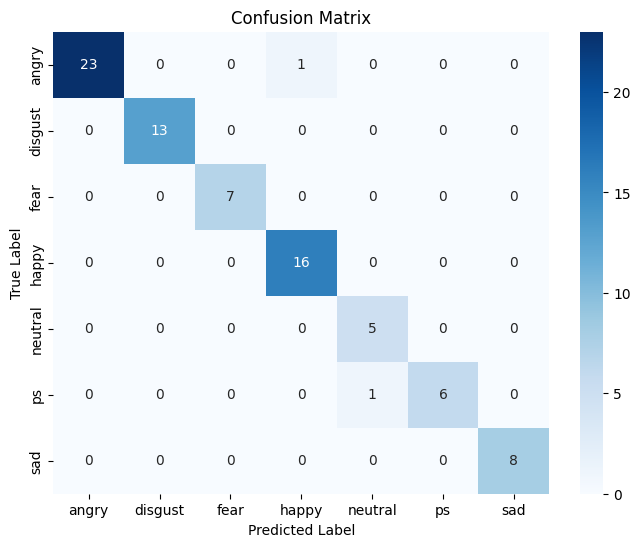

In [94]:
## Visualizing Confusion Matrix:

from sklearn.metrics import confusion_matrix
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

cm = confusion_matrix(actual_data, pred_data)

cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [95]:
## Saving Predicted Emotions to CSV
final_data.to_csv('prediction-emotion-label.csv', index=False)